In [1]:
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 5.2 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 7.7 MB 49.3 MB/s 
     |████████████████████████████████| 219 kB 47.4 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=1fcaf8ba298d38885112c73401dc9d52fe8bc6f6c7cc8872533bbd5e0f7df08c
  Stored in directory: /root/.cache/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap

In [3]:
#create nodes
G = nx.DiGraph()
nodes = open("Nodes.txt", 'r').read().split('\n')
lat = open("Latitude.txt", 'r').read().split('\n')
lon = open("Longitude.txt", 'r').read().split('\n')
airports = np.column_stack((nodes, lat, lon))

airports = airports[0:len(airports)-1,:]
clean_airports = []

for i in airports:
  if float(i[2]) <= 180 and float(i[2]) >= -180 and float(i[1]) <= 90 and float(i[1]) >= -90:
    clean_airports.append(i)
    G.add_node(i[0], pos = (i[1], i[2]))
clean_airports = np.asarray(clean_airports)

In [4]:
len(list(G.nodes))

5998

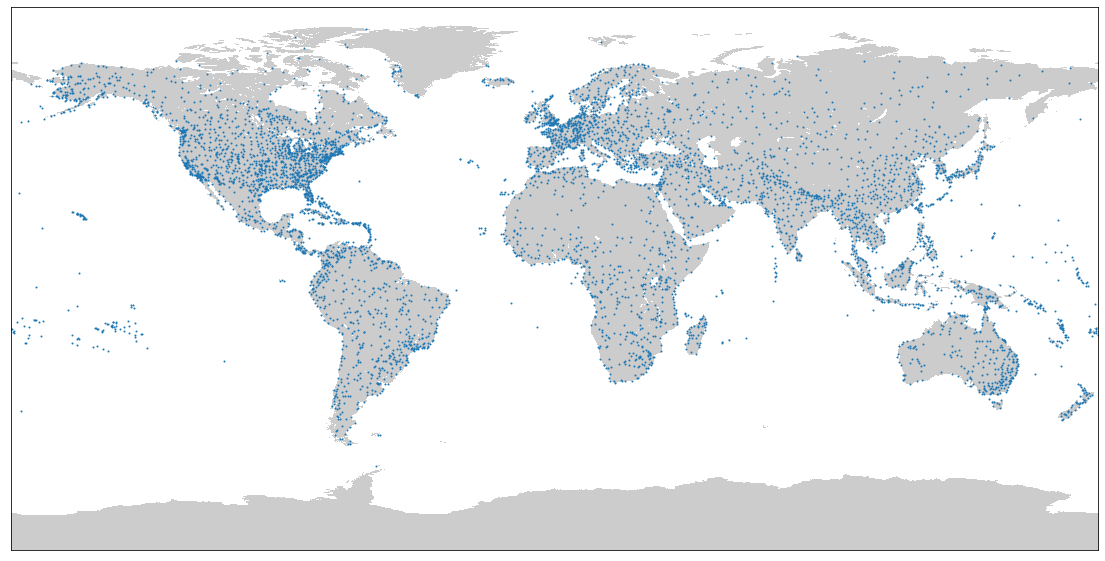

In [5]:
fig = plt.figure()
fig.set_size_inches(20, 10)
pos=nx.get_node_attributes(G,'pos')
for k, v in pos.items():
  pos[k] = (float(v[1]), float(v[0]))
nx.draw_networkx_nodes(G, pos, node_size = 1, label = False)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.xticks(range(-180,181, 30))
plt.yticks(range(-90,91, 15))

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawlsmask()

In [6]:
sou = open("Source.txt", 'r').read().split('\n')
des = open("Destination.txt", 'r').read().split('\n')
routes = np.column_stack((sou, des))
print(len(routes))

67663


In [7]:
delete_list_sou = list(set(routes[:,0]) - set(clean_airports[:,0]))

In [8]:
delete_list_des = list(set(routes[:,1]) - set(clean_airports[:,0]))

In [9]:
print(delete_list_sou)

['GSM', 'QUB', 'KOZ', 'NUP', 'QUV', 'NTG', 'RMP', 'AOS', 'KGQ', 'SAX', 'EDA', 'GCW', 'GRV', 'BCD', 'PSA', 'NSQ', 'PEG', 'KTB', 'KLL', 'INB', 'TKE', 'ZIG', 'CKX', 'FDE', 'BCV', 'TTQ', 'AGM', 'ATT', 'CDG', 'SXP', 'TQA', 'WWT', 'DHB', 'KCC', 'ELL', 'CKD', 'INC', 'LMC', 'QUW', 'IOQ', 'VCE', 'GSE', 'TCR', 'QOQ', 'PPN', 'CIA', 'KBC', 'UPK', 'SZI', 'SYB', 'JIJ', 'MPH', 'JUK', 'AOQ', 'TVS', 'KPB', 'RIG', 'OLH', 'PNL', 'TAL', 'BZO', 'PMF', 'KAE', 'ZBL', 'QUO', 'SGG', 'KXU', 'MNT', 'TNO', 'TQI', 'KUZ', 'SVR', 'PUM', 'OGM', 'PEC', 'BNY', 'TGC', 'HKB', 'FVM', 'FBS', 'PND', 'IKE', 'KCL', 'ORI', 'JJA', 'PHO', 'KHQ', 'LKE', 'TZA', 'SVC', 'WSX', 'EAR', 'TNK', 'KCG', 'RMI', 'SLI', 'PPV', 'NKI', 'OHH', 'RCH', 'CZH', 'LCR', 'QFN', 'HYL', 'MLH', 'WTL', 'MPP', 'KUS', 'YKT', 'BLD', 'SIC', 'DLI', 'CGA', 'SZE', 'KWF', 'VRN', 'KGX', 'SSB', 'NQU', 'BXU', 'OTD', 'ADZ', 'BVV', 'AUA', 'DGA', 'GHE', 'PQS', 'UGB', 'LGQ', 'KKI', 'IOT', 'MUC', 'KCQ', 'SVS', 'DIJ', 'ORZ', 'MRA', 'KTW', 'PAF', 'FLR', 'BAQ', 'MCM', 'SRV'

In [10]:
print(delete_list_des)

['GSM', 'QUB', 'KOZ', 'NUP', 'QUV', 'NTG', 'RMP', 'AOS', 'KGQ', 'SAX', 'EDA', 'GCW', 'GRV', 'BCD', 'PSA', 'NSQ', 'PEG', 'KTB', 'KLL', 'INB', 'TKE', 'ZIG', 'CKX', 'FDE', 'BCV', 'TTQ', 'AGM', 'ATT', 'CDG', 'SXP', 'TQA', 'WWT', 'ELL', 'KCC', 'DHB', 'CKD', 'INC', 'LMC', 'QUW', 'IOQ', 'VCE', 'GSE', 'TCR', 'QOQ', 'PPN', 'CIA', 'KBC', 'UPK', 'SZI', 'SYB', 'JIJ', 'MPH', 'JUK', 'AOQ', 'TVS', 'KPB', 'RIG', 'KPR', 'OLH', 'PNL', 'TAL', 'BZO', 'PMF', 'QFX', 'KAE', 'ZBL', 'QUO', 'SGG', 'KXU', 'MNT', 'TNO', 'TQI', 'KUZ', 'SVR', 'PUM', 'OGM', 'PEC', 'BNY', 'TGC', 'HKB', 'FVM', 'FBS', 'PND', 'IKE', 'KCL', 'ORI', 'JJA', 'PHO', 'KHQ', 'LKE', 'TZA', 'SVC', 'WSX', 'EAR', 'MTE', 'TNK', 'KCG', 'RMI', 'SLI', 'PPV', 'NKI', 'OHH', 'RCH', 'CZH', 'LCR', 'QFN', 'HYL', 'MLH', 'WTL', 'KZB', 'MPP', 'KUS', 'BSS', 'YKT', 'BLD', 'SIC', 'DLI', 'CGA', 'SZE', 'KWF', 'VRN', 'KGX', 'SSB', 'NQU', 'BXU', 'OTD', 'ADZ', 'BVV', 'AUA', 'DGA', 'GHE', 'PQS', 'UGB', 'LGQ', 'KKI', 'IOT', 'MUC', 'KCQ', 'SVS', 'DIJ', 'ORZ', 'MRA', 'KTW'

In [11]:
delete_list = []
for i in range(len(routes)):
  if routes[i][0] in delete_list_sou or routes[i][1] in delete_list_des:
    delete_list.append(i)
print(len(delete_list))

3933


In [12]:
routes = np.delete(routes, delete_list, 0)
print(len(routes))

63730


In [13]:
for i in routes:
  G.add_edge(i[0], i[1])

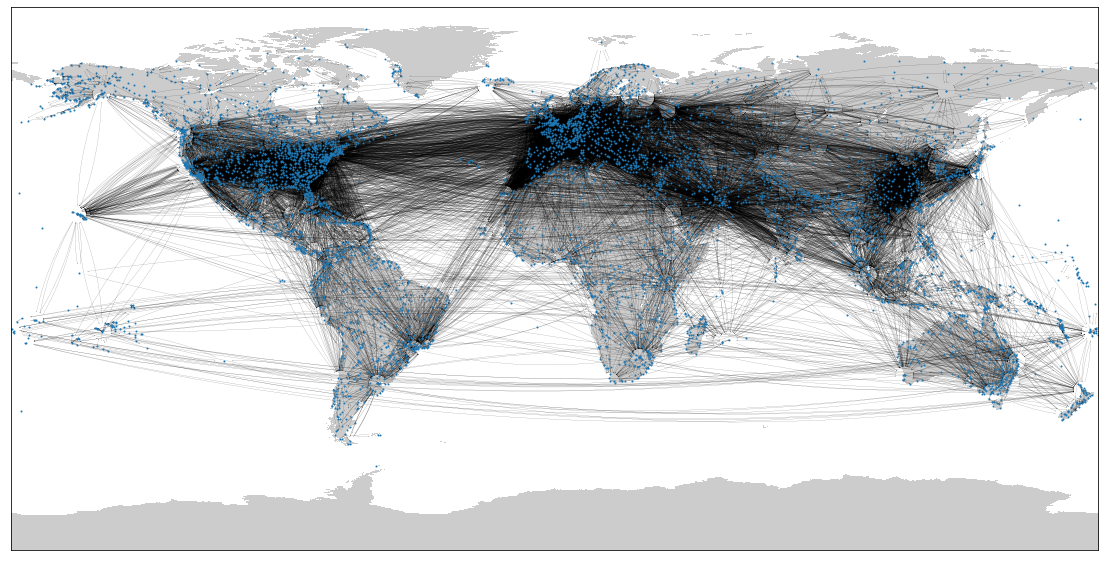

In [14]:
fig = plt.figure()
fig.set_size_inches(20, 10)
pos=nx.get_node_attributes(G,'pos')

for k, v in pos.items():
    pos[k] = (float(v[1]), float(v[0]))
    
nx.draw_networkx_nodes(G, pos, node_size = 1, label = False)
nx.draw_networkx_edges(G, pos,width = 0.1, arrowsize = 1 ,connectionstyle="arc3,rad=0.1")
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.xticks(range(-180,181, 30))
plt.yticks(range(-90,91, 15))

m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.drawlsmask()


In [15]:
# create edge attribute weight with default None 
nx.set_edge_attributes(G, values=None, name = 'weight')

#count the occurance of the airport in the routes database
sources, sources_counts=np.unique(routes[:,0], return_counts=True)
des, des_counts=np.unique(routes[:,1], return_counts=True)

# create edge attribute source_occurrence with default None
nx.set_node_attributes(G, values=0, name = 'so')
for node in list(sources):
    G.nodes[node]['so'] = list(sources_counts)[list(sources).index(node)]

# create edge attribute destination_occurrence with default None
nx.set_node_attributes(G, values=0, name = 'do')
for node in list(des):
    G.nodes[node]['do'] = list(des_counts)[list(des).index(node)]
  
def add_weight_to_edges(graph):
    for node in graph.nodes:
        neighbors = [n for n in G.neighbors(node)]
        for nb in neighbors:
            graph[node][nb]['weight'] = np.mean([graph.nodes[node]['so'],G.nodes[node]['do'],graph.nodes[nb]['so'],graph.nodes[nb]['do']])

add_weight_to_edges(G)

In [41]:
# SIR model
def SIR(G, time, beta, gamma): #takes 0.2 seconds per time

  import math
  import random

  # Set edge attribute weight fraction (weight of an edge/average number of degrees in the neighborhood of the source node)
  nx.set_edge_attributes(G, values=None, name = 'weight fraction')
  nx.set_edge_attributes(G, values=None, name = 'weight total')

  weight_total = []
  for i in G.nodes():
    weight_neighbors = []
    for j in G.neighbors(i):
      weight_neighbors.append(G[i][j]['weight'])
    G.nodes[i]['weight total'] = sum(weight_neighbors)

  for i in G.nodes():
    for j in G.edges(i):
      if G.nodes[i]['weight total'] != 0:
        G.edges[j]['weight fraction'] = G.edges[j]['weight']/G.nodes[i]['weight total']

  # create node attribute degree
  nx.set_node_attributes(G, values = 0, name = 'degree')
  for i in G.nodes():
    G.nodes[i]['degree'] = G.degree[i]

  # remove airports with 0 degree
  delete_list = []
  for i in G.nodes():
    if G.nodes[i]['degree'] == 0:
      delete_list.append(i)
  for i in delete_list:
    G.remove_node(i)

  # Add node attribute 'inf_time', as in time since infection
  nx.set_node_attributes(G, values = 1, name  = 'inf_time')

  ni = (1-gamma/beta)*((math.exp(beta - gamma)**1)/(1+math.exp(beta - gamma)**1)) # infected portion intitally

  # Infect the random airport
  nx.set_node_attributes(G, values = 0, name = 'infected population')
  rnd  = random.choice(list(G.nodes()))
  G.nodes[rnd]['infected population'] = ni*G.nodes[rnd]['degree']
  first_inf_pop = G.nodes[rnd]['infected population']
  print(f'{rnd} was chosen as 1st infected airport with infected population: {first_inf_pop}')

  # Infect neighbours
  for i in range(time):
    for node in G.nodes():
      neighbors = [n for n in G.neighbors(node)]
      for nb in neighbors:
        # Check that airport is infected and roll the dice if the infection occurs
        if G.nodes[node]['infected population'] != 0 and\
        np.random.rand(1)[0] <= (G.nodes[node]['infected population']/G.nodes[node]['degree'])*G.edges[node,nb]['weight fraction']:
          # infect neighbours
          G.nodes[nb]['infected population'] = ni*G.nodes[nb]['degree']
      # update inf_time for already infected airports and calculate new level of infection
      if G.nodes[node]['infected population'] != 0:
        inf_time = G.nodes[node]['inf_time']

        G.nodes[node]['infected population'] = G.nodes[node]['degree']*\
        (1-gamma/beta)*((math.exp(beta - gamma)**inf_time)/(1+math.exp(beta - gamma)**inf_time))

        G.nodes[node]['inf_time'] = inf_time + 1

In [48]:
def worldmap(G): #takes 3 minutes to compute

  nx.set_node_attributes(G, values = '#1f77b4', name = 'color')
  for i in G.nodes():
    if G.nodes[i]['infected population'] != 0:
      G.nodes[i]['color'] = 'r'

  fig = plt.figure()
  fig.set_size_inches(20, 10)
  pos=nx.get_node_attributes(G,'pos')
  color=nx.get_node_attributes(G,'color')

  for k, v in pos.items():
      pos[k] = (float(v[1]), float(v[0]))
      
  nx.draw_networkx_nodes(G, pos, node_color = color.values(), node_size = 1, label = False)
  nx.draw_networkx_edges(G, pos,width = 0.1, arrowsize = 1 ,connectionstyle="arc3,rad=0.1")
  plt.xlim([-180, 180])
  plt.ylim([-90, 90])
  plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
  plt.xticks(range(-180,181, 30))
  plt.yticks(range(-90,91, 15))

  m = Basemap(projection='cyl', resolution=None,
              llcrnrlat=-90, urcrnrlat=90,
              llcrnrlon=-180, urcrnrlon=180, )
  m.drawlsmask()

In [75]:
# Plot histogram of infected airports
def histinfo(G):

  fig = plt.figure()
  fig.set_size_inches(10, 10)
  x = nx.get_node_attributes(G, 'infected population').values()
  percentage = round(sum(x)/sum(nx.get_node_attributes(G, 'degree').values()),2) * 100
  plt.hist(x, color = 'red', bins=np.arange(min(x), max(x) + 5, 5))
  plt.title(f'Infected population with {percentage}% infected')
  plt.ylabel('# of airports')
  plt.xlabel('# of infected')

In [58]:
def num_of_inf_airports(G):
  infected_list = []
  for i in G.nodes():
    if G.nodes[i]['infected population'] != 0:
      infected_list.append(i)
  print(f'There are {len(infected_list)} infected airports')

In [80]:
SIR(G, time = 40, beta = 0.2, gamma = 0.02)

LBV was chosen as 1st infected airport with infected population: 14.221339090950439


In [81]:
num_of_inf_airports(G)

There are 1261 infected airports


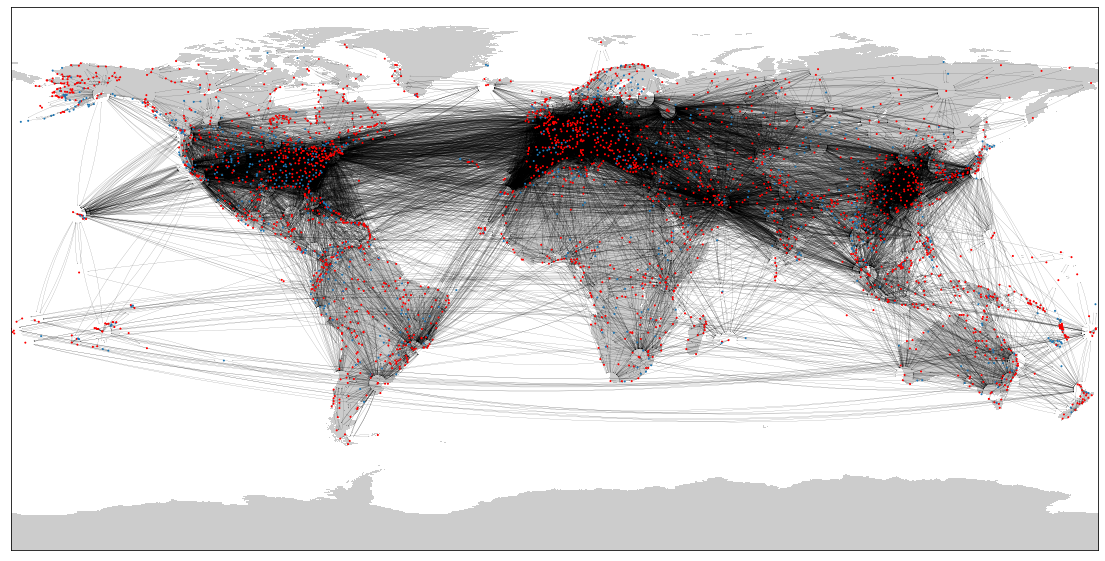

In [60]:
worldmap(G)

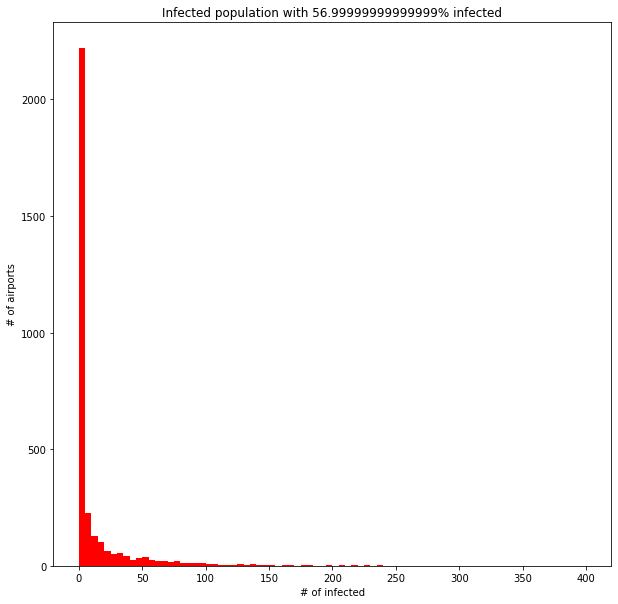

In [82]:
histinfo(G)